## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Data Validation:

This Recipe Dataset has 947 rows and 8 columns out of which **recipe** column has no use it just an index, so we consider only 7 rows.

**Identify the data type:**
> calories, carbohydrate, sugar, protien all has datatype of float64 because it has decimal values <br>Category coluumn's  datatype should be Categorical<br>
servings columns has integer vvalue , it's datatype should be int8

**Check for missing values:**
> columns like `calories, carbohydrate, sugar, protien` total have **54 null/Nan values**<br> 
- My strategy to handle these missing values 
    - removing them
    - impute the missing values with mean grouped by category and servings
    - impute the missing values with median grouped by category and servings
> i'm going to try all of them and see which one give best result

**Validate categorical variables:**
> **servings column** has uniques values of <br>
`['6', '4', '1', '2', '4 as a snack', '6 as a snack']`<br>
i'm changing `'4 as a snack', '6 as a snack'` to 4 and 6, convert this coulumn's datatype to category

> **category column** has unique values of <br>

   - Breakfast
   - Chicken Breast
   - Beverages
   - Lunch/Snacks
   - Potato
   - Pork
   - Vegetable
   - Dessert
   - Meat
   - Chicken
   - One Dish Meal <br>
> merging chicken and chichken Breast and convert this column datatype to Category

> **high_traffic column** has unique value of `[High, nan]`<br>
replacing nan's with **Low**

In [2]:
df = pd.read_csv('recipe_site_traffic_2212.csv', index_col=None)
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [4]:
df.drop('recipe', inplace=True, axis=1)

### <b>How many Missing data points do we have?</b>

In [5]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
print(missing_values_count)

calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


In [6]:
total_cells = np.product(df.shape)
total_nulls = df.isnull().sum().sum()
percent_missing = (total_nulls / total_cells) * 100

print(f"{round(percent_missing, 2)}% cells in the dataset are empty")

8.76% cells in the dataset are empty


In [7]:
df['high_traffic'].unique()

array(['High', nan], dtype=object)

### we can replace all the High traffic with 1 and nan with 0
<p>because here in dataset we can infer that nan could be low traffic or do not bring any high traffic</p>

In [8]:
# replace High = 1 and other with low = 0

df['high_traffic'] = df.high_traffic.fillna('Low')

df['high_traffic'].unique()

array(['High', 'Low'], dtype=object)

In [9]:
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,NaN,NaN,NaN,NaN,Pork,6,High
1,35.48,38.56,0.66,0.92,Potato,4,High
2,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,97.03,30.56,38.63,0.02,Beverages,4,High
4,27.05,1.85,0.80,0.53,Beverages,4,Low


### servings column
<p>to me it makes more sense to convert '4 as a snack' to 4 <br> and '6 as a snack' to 6</p>

In [10]:
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [11]:
replacement = {'4 as a snack' : 4, '6 as a snack': 6}
df['servings'] = df['servings'].replace(replacement).astype(np.int8)


df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,NaN,NaN,NaN,NaN,Pork,6,High
1,35.48,38.56,0.66,0.92,Potato,4,High
2,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,97.03,30.56,38.63,0.02,Beverages,4,High
4,27.05,1.85,0.80,0.53,Beverages,4,Low


In [12]:
df['servings'].unique()

array([6, 4, 1, 2], dtype=int8)

### category column

In [13]:
# Chicken Breast and Chicken recipe kind of similar and we are grouping it together.
# also changing the datatype to category

df['category'].replace('Chicken Breast', 'Chicken', inplace=True)
df['category'] = df['category'].astype('category')

In [14]:
print(df.category.unique().tolist())

['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert']


## imputation

In [15]:
def drop_rows_or_impute(orig_df, drop_row = False, impute_by='median'):
    new_df = orig_df.copy()
    if new_df.isnull().sum().sum() != 0:
        if drop_row:
            new_df.dropna(inplace=True)
        else:
            null_val_columns = new_df.columns[new_df.isnull().any()].tolist()
            for col in null_val_columns:
                new_df[col] = new_df[col].fillna(new_df.groupby(['category', 'servings'])[col].transform(impute_by))
    return new_df


In [16]:
# i want to change the null values to `median` of it based on category and servings

new_df = drop_rows_or_impute(orig_df = df, drop_row=False, impute_by='mean')


## checking dataframe after imputation

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   calories      947 non-null    float64 
 1   carbohydrate  947 non-null    float64 
 2   sugar         947 non-null    float64 
 3   protein       947 non-null    float64 
 4   category      947 non-null    category
 5   servings      947 non-null    int8    
 6   high_traffic  947 non-null    object  
dtypes: category(1), float64(4), int8(1), object(1)
memory usage: 39.3+ KB


In [18]:
old_df = new_df.copy()

**replace `calories, carbohydrate, sugar, protien` with total serving not just one serving so multiplying all columns with `servings`** 

In [19]:
def get_numeric_columns():
    only_numeric_cols = df.select_dtypes(include='number').columns.tolist()
    only_numeric_cols.remove('servings')
    return only_numeric_cols

In [20]:
def mul_with_servings(df):
    only_numeric_cols = get_numeric_columns()
    for col in only_numeric_cols:
        df[col] = df[col] * df['servings']
    return df

In [21]:
new_df = mul_with_servings(new_df)

In [22]:
new_df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,4587.848,120.432,42.08,399.168,Pork,6,High
1,141.920,154.240,2.64,3.680,Potato,4,High
2,914.280,42.680,3.09,2.880,Breakfast,1,Low
3,388.120,122.240,154.52,0.080,Beverages,4,High
4,108.200,7.400,3.20,2.120,Beverages,4,Low


In [23]:
old_df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,764.641333,20.072,7.013333,66.528,Pork,6,High
1,35.480000,38.560,0.660000,0.920,Potato,4,High
2,914.280000,42.680,3.090000,2.880,Breakfast,1,Low
3,97.030000,30.560,38.630000,0.020,Beverages,4,High
4,27.050000,1.850,0.800000,0.530,Beverages,4,Low


# Exploratory Analysis:

In [24]:
new_df['high_traffic'].value_counts(normalize=True)*100

High    60.61246
Low     39.38754
Name: high_traffic, dtype: float64

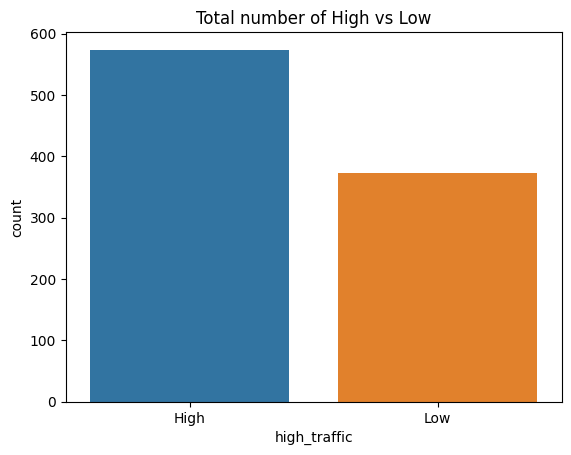

In [25]:
ax = sns.countplot(data=new_df, x='high_traffic')
ax.set_title('Total number of High vs Low');

In [26]:
x = new_df.groupby(['servings', 'category', 'high_traffic']).mean().reset_index()
x.head(5)

,servings,category,high_traffic,calories,carbohydrate,sugar,protein
0,1,Beverages,High,396.370000,16.850000,2.480000,0.270000
1,1,Beverages,Low,168.971053,13.046842,10.751053,0.776842
2,1,Breakfast,High,439.847778,38.745556,5.365556,20.376667
3,1,Breakfast,Low,381.916471,39.424706,4.094118,25.957647
4,1,Chicken,High,546.630000,22.574444,3.133889,51.603889


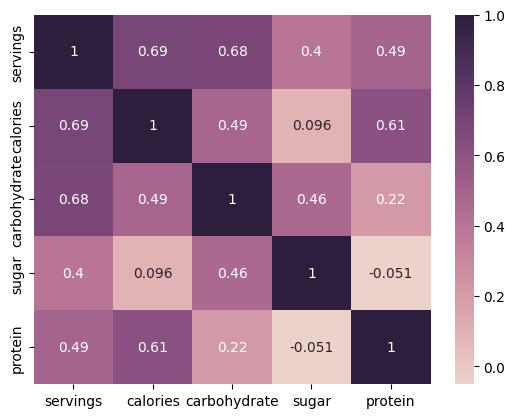

In [27]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(x.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True);

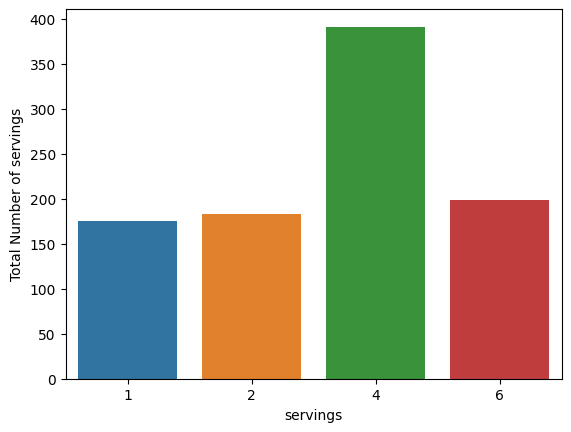

In [28]:
ax = sns.countplot(data=new_df, x='servings')
ax.set_xlabel('servings')
ax.set_ylabel('Total Number of servings');

<AxesSubplot: xlabel='high_traffic', ylabel='servings'>

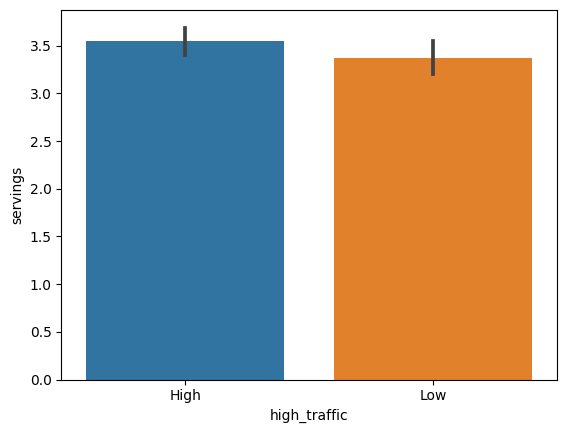

In [29]:
sns.barplot(x='high_traffic', y='servings', data=new_df)

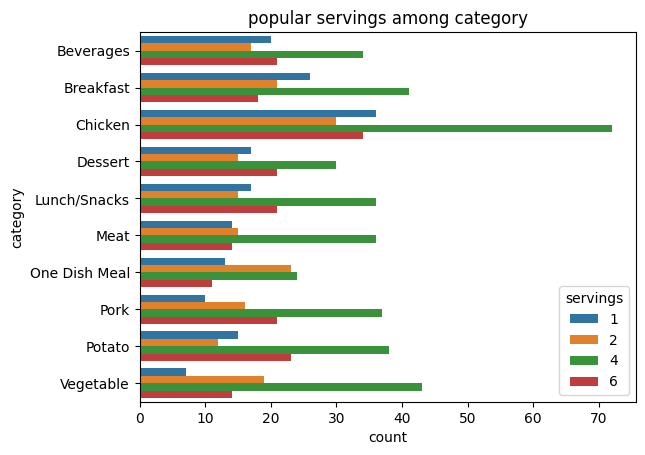

In [30]:
ax = sns.countplot(data=new_df, y='category', hue='servings')
ax.set_title('popular servings among category');

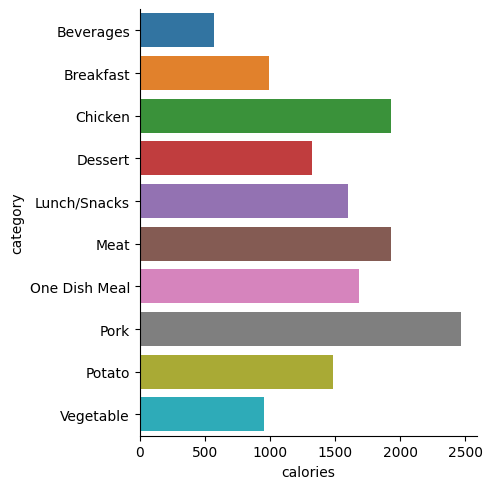

In [31]:
ax = sns.catplot(data=new_df, x='calories', y='category', kind='bar',ci=None )
ax.set_titles('Calories for each category');



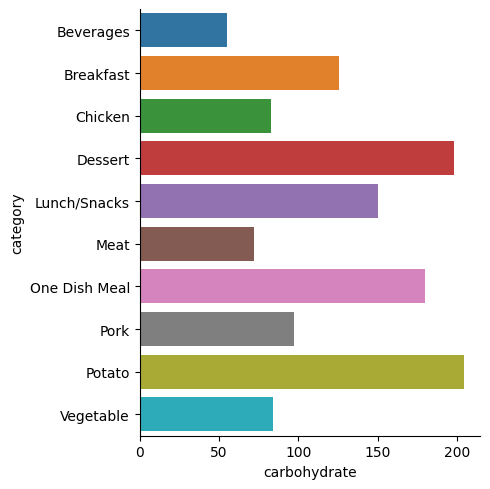

In [32]:
sns.catplot(data=new_df, x='carbohydrate', y='category', kind='bar', ci=None );

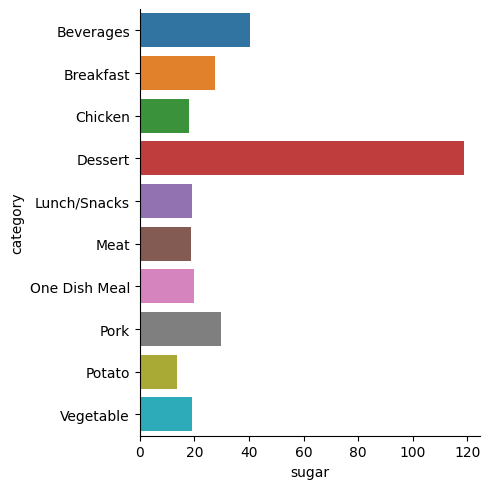

In [33]:
sns.catplot(data=new_df, x='sugar', y='category', kind='bar', ci=None );

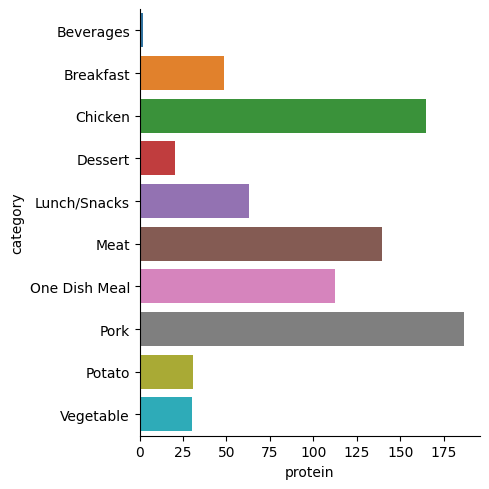

In [34]:
sns.catplot(data=new_df, x='protein', y='category', kind='bar', ci=None );

### Which particular category brings High Traffic?

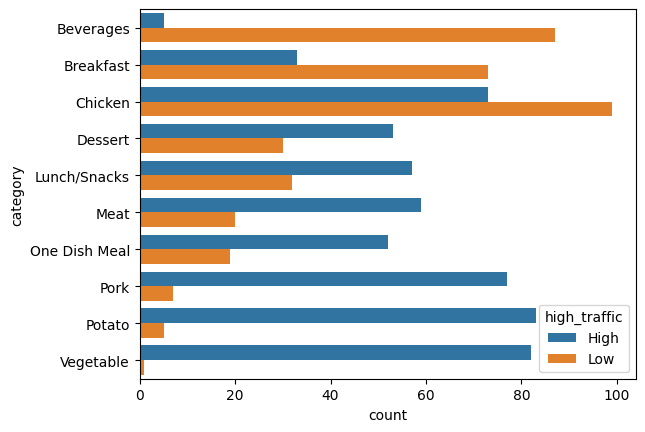

In [35]:
sns.countplot(data=new_df, y="category", hue="high_traffic");

### Which category has high Calories and find if they bring High Traffic or Low

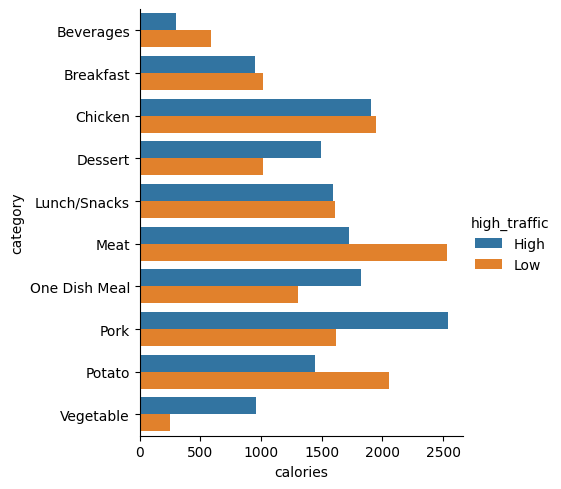

In [36]:
sns.catplot(x="calories", y="category", hue="high_traffic", kind="bar", data=new_df, ci=None);

### Which category has high Carbohydrate and find if they bring High Traffic or Low

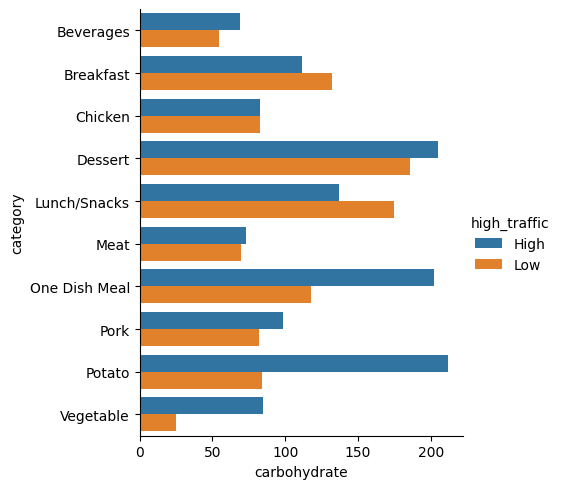

In [37]:
sns.catplot(x="carbohydrate", y="category", hue="high_traffic", kind="bar", data=new_df, ci=None);

### Which category has high Sugar and find if they bring High Traffic or Low

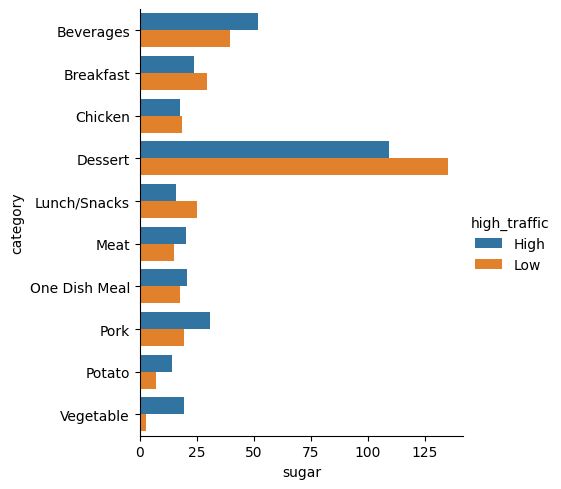

In [38]:
sns.catplot(x="sugar", y="category", hue="high_traffic", kind="bar", data=new_df, ci=None);

### Which category has high Protein and find if they bring High Traffic or Low

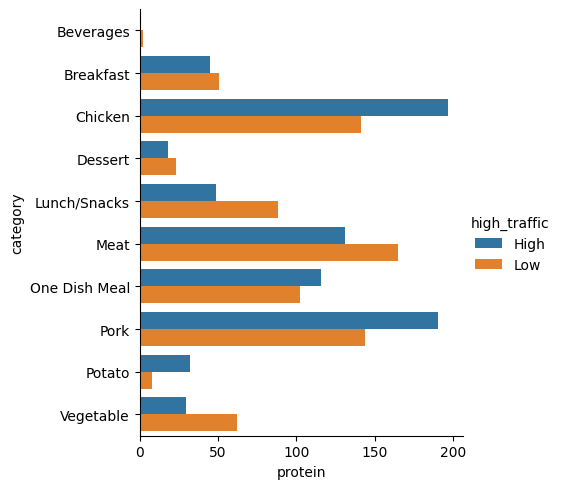

In [39]:
sns.catplot(x="protein", y="category", hue="high_traffic", kind="bar", data=new_df, ci=None);

### Does Servings has anything to do with High Traffic?

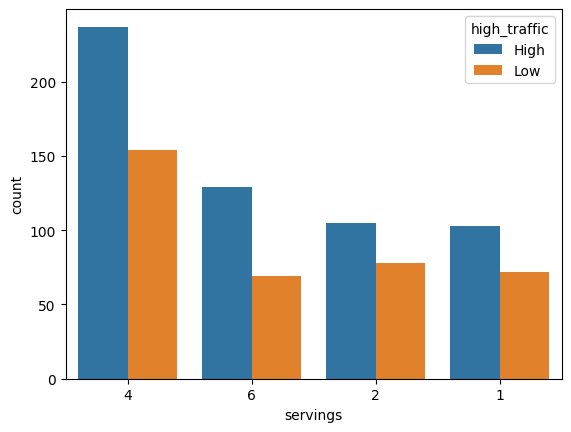

In [40]:
sns.countplot(data=new_df, x='servings', hue='high_traffic', order=new_df['servings'].value_counts().index);

In [41]:
new_df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,4587.848,120.432,42.08,399.168,Pork,6,High
1,141.920,154.240,2.64,3.680,Potato,4,High
2,914.280,42.680,3.09,2.880,Breakfast,1,Low
3,388.120,122.240,154.52,0.080,Beverages,4,High
4,108.200,7.400,3.20,2.120,Beverages,4,Low


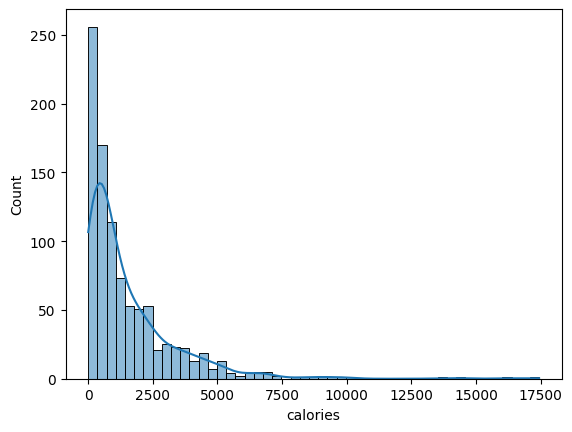

In [42]:
sns.histplot(x='calories', data=new_df, kde=True);

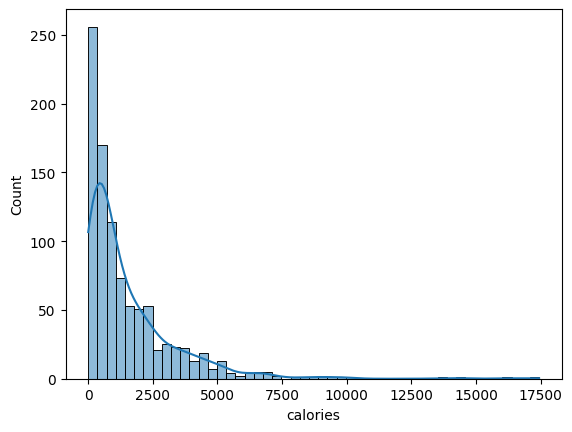

In [43]:
sns.histplot(x='calories', data=new_df, kde=True);

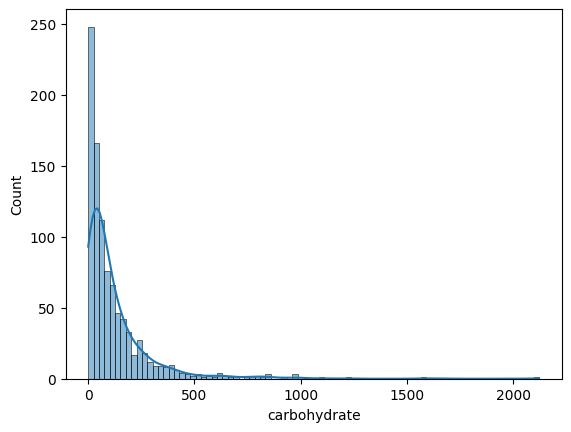

In [44]:
sns.histplot(x='carbohydrate', data=new_df, kde=True);

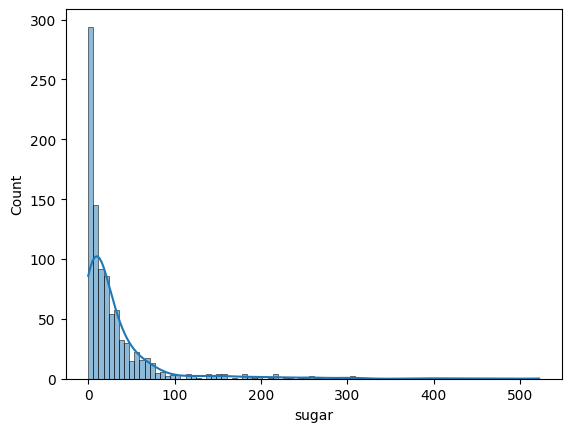

In [45]:
sns.histplot(x='sugar', data=new_df, kde=True);

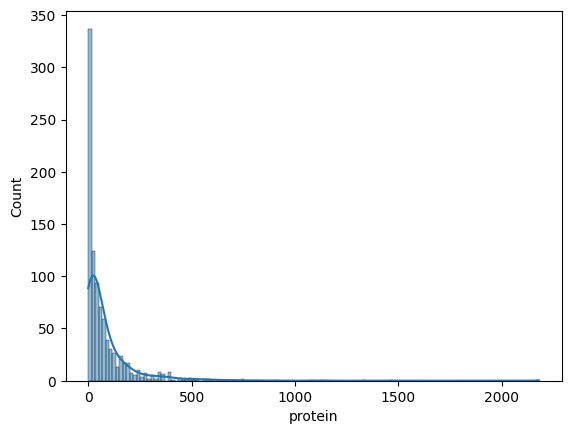

In [46]:
sns.histplot(x='protein', data=new_df, kde=True);

>`calories, carbohydrate, protein, sugar` all are **right skewed** or **Positively Skewed**

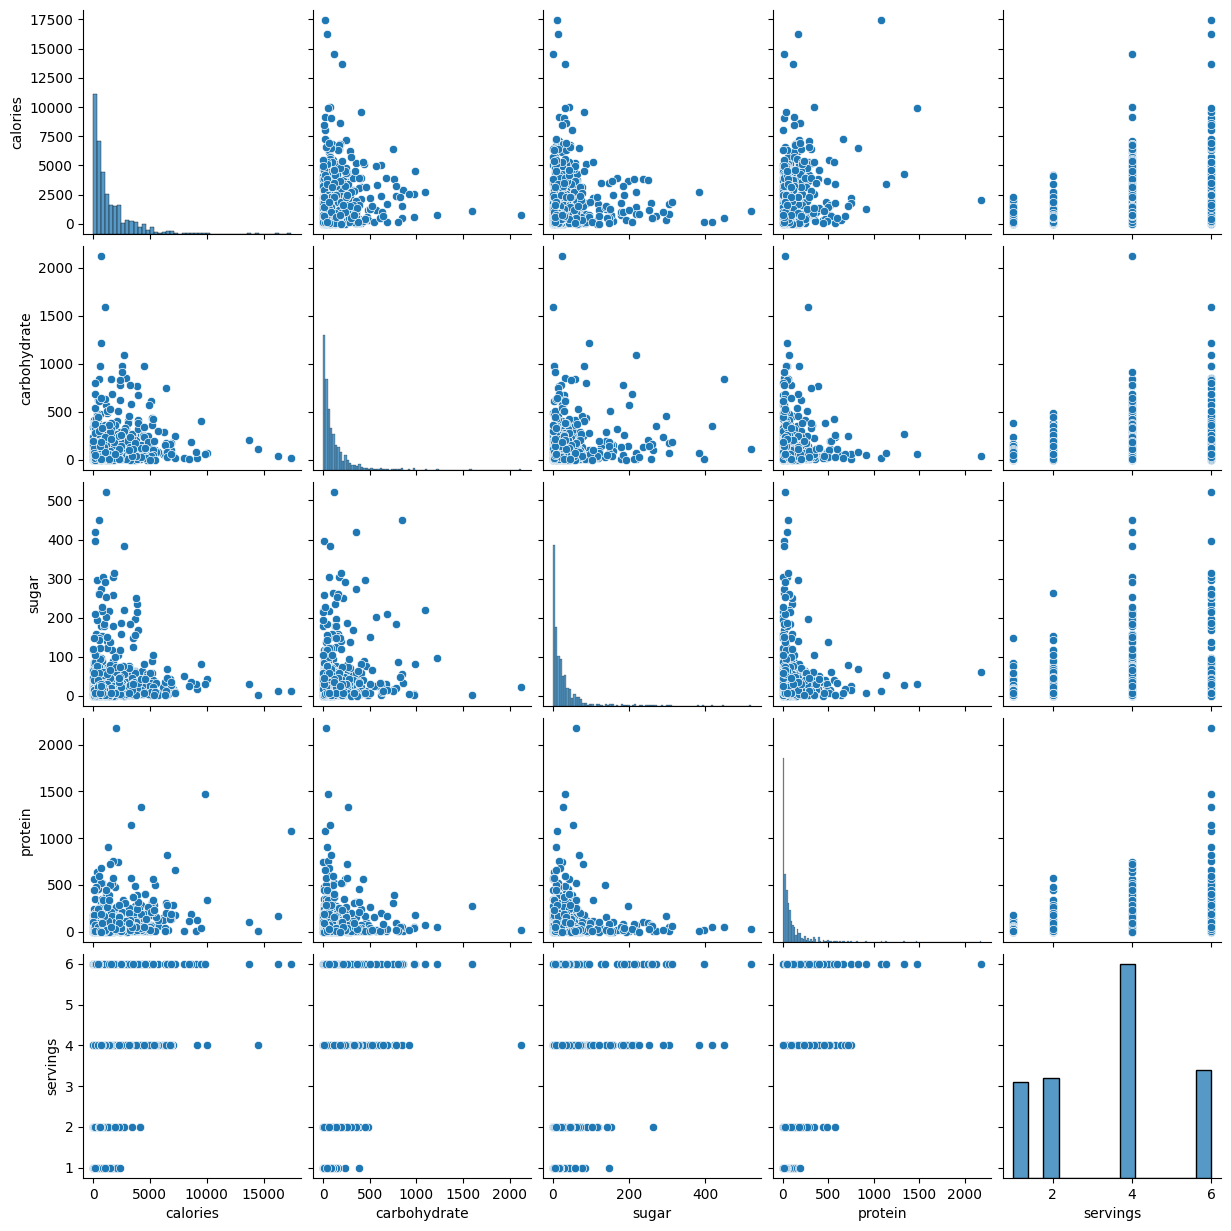

In [47]:
sns.pairplot(data=new_df);

In [48]:
only_numeric_cols = get_numeric_columns()
print(only_numeric_cols)

['calories', 'carbohydrate', 'sugar', 'protein']


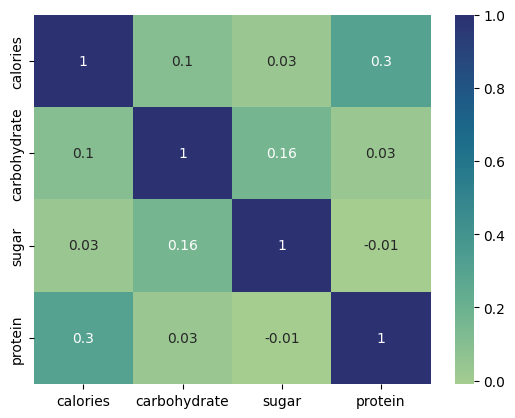

In [49]:
sns.heatmap(round(new_df[only_numeric_cols].corr(), 2), annot=True, cmap='crest');

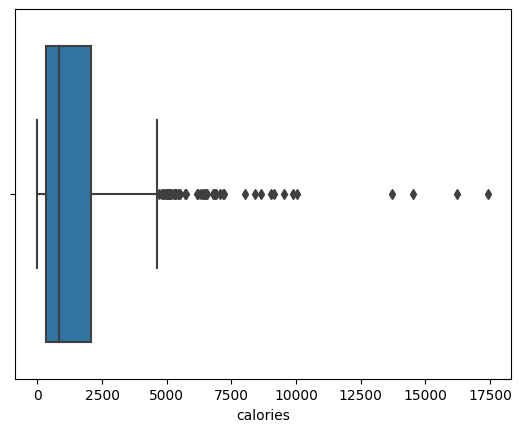

In [50]:
sns.boxplot(x='calories', data=new_df);

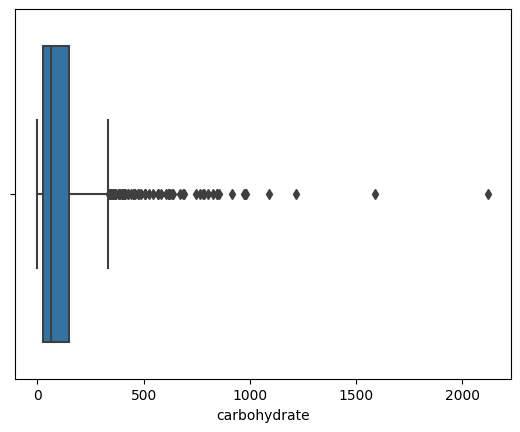

In [51]:
sns.boxplot(x='carbohydrate', data=new_df);

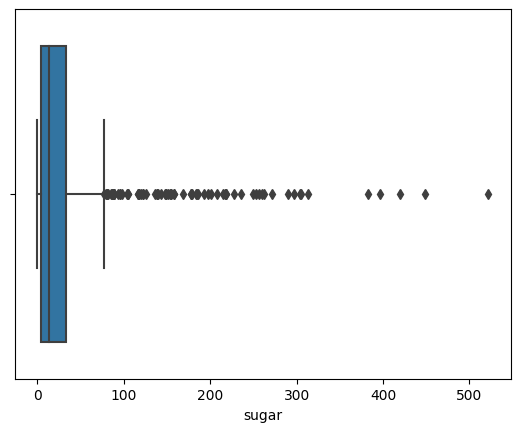

In [52]:
sns.boxplot(x='sugar', data=new_df);

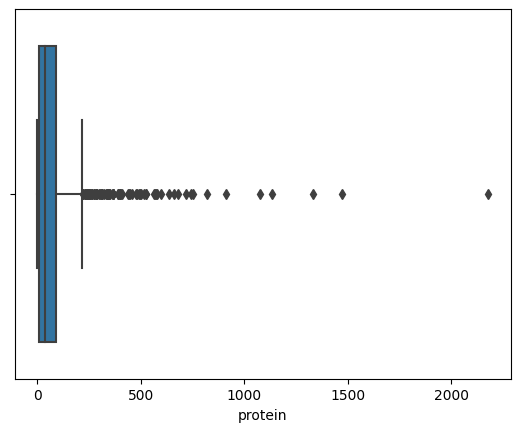

In [53]:
sns.boxplot(x='protein', data=new_df);

# Supporting Findings:

- One Conclusion from Histogram is `calories, carbohydrate, protein, sugar` all are **right skewed** or **Positively Skewed**

- Servings has some important role in High Traffic. we will later find out is it really important feature to have.

- Category also has important role for Traffic, because in our plot we found protein riched food category has good impact on Traffic.

- Desset has High amount of Sugar and our plot indeed support that claim, but they bring low traffic

- High Carbohydrate riched food category like `One Dish Meal, Potato, Vegetable, Dessert` bring high traffic.

- '4' servings are quite popular

# Model Development

## Model Fitting

> The problem type in this scenario is ***binary classification***. We are trying to predict whether a recipe will have high traffic or not, based on certain features such as `calories, carbohydrate, sugar, protien, recipi categories, servings`.

>I selected the **Logistic Regression,  LinearSVC and Decision Tree** models because they are both widely used for binary classification problems and are suitable for handling large datasets with many features. Logistic Regression is a linear model that is often used for binary classification tasks, and it is relatively simple to implement and interpret. On the other hand, LinearSVC is a linear support vector classifier that works well for high-dimensional data and is often used for text classification tasks.

Both models have different strengths and weaknesses, and it's important to evaluate both models and compare their performance on the problem at hand. By doing so, we can select the best model for the specific problem and ensure that it aligns with the business goals and objectives.

In this case, we selected the **LinearSVC** model as it provided a higher accuracy score and performed better in terms of precision, recall, F1 score, and ROC AUC score on the test data. However, it's important to note that different models may perform better or worse depending on the specific dataset and features used, and it's always recommended to evaluate multiple models before making a final selection.

In [54]:
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,NaN,NaN,NaN,NaN,Pork,6,High
1,35.48,38.56,0.66,0.92,Potato,4,High
2,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,97.03,30.56,38.63,0.02,Beverages,4,High
4,27.05,1.85,0.80,0.53,Beverages,4,Low


**here i'm just checking which imputation works best either droping the null values or impute by mean or median**

In [55]:
# # first running model dropping all null values

# new_df = drop_rows_or_impute(orig_df = df, drop_row=True)
# new_df = mul_with_servings(new_df)
# new_df

In [56]:
# # running model again with imputing the values with median

# new_df = drop_rows_or_impute(orig_df= df, drop_row= False, impute_by= 'median')
# new_df = mul_with_servings(new_df)
# new_df

In [57]:
# # running model again with imputing the values with mean

new_df = drop_rows_or_impute(orig_df= df, drop_row= False, impute_by= 'mean')
new_df = mul_with_servings(new_df)
new_df

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,4587.848,120.432,42.08,399.168,Pork,6,High
1,141.920,154.240,2.64,3.680,Potato,4,High
2,914.280,42.680,3.09,2.880,Breakfast,1,Low
3,388.120,122.240,154.52,0.080,Beverages,4,High
4,108.200,7.400,3.20,2.120,Beverages,4,Low
...,...,...,...,...,...,...,...
942,2322.000,10.620,44.78,88.440,Lunch/Snacks,2,Low
943,624.406,139.056,5.94,11.714,Potato,2,High
944,1903.480,58.840,7.14,27.740,Pork,2,High
945,1599.660,214.620,5.82,48.420,Potato,6,High


In [58]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   calories      947 non-null    float64 
 1   carbohydrate  947 non-null    float64 
 2   sugar         947 non-null    float64 
 3   protein       947 non-null    float64 
 4   category      947 non-null    category
 5   servings      947 non-null    int8    
 6   high_traffic  947 non-null    object  
dtypes: category(1), float64(4), int8(1), object(1)
memory usage: 39.3+ KB


### seperate out features and target varibale

In [59]:
X = new_df.iloc[:, :-1]

In [60]:
X

,calories,carbohydrate,sugar,protein,category,servings
0,4587.848,120.432,42.08,399.168,Pork,6
1,141.920,154.240,2.64,3.680,Potato,4
2,914.280,42.680,3.09,2.880,Breakfast,1
3,388.120,122.240,154.52,0.080,Beverages,4
4,108.200,7.400,3.20,2.120,Beverages,4
...,...,...,...,...,...,...
942,2322.000,10.620,44.78,88.440,Lunch/Snacks,2
943,624.406,139.056,5.94,11.714,Potato,2
944,1903.480,58.840,7.14,27.740,Pork,2
945,1599.660,214.620,5.82,48.420,Potato,6


In [61]:
y = new_df.iloc[:, -1]

In [62]:
y

0      High
1      High
2       Low
3      High
4       Low
       ... 
942     Low
943    High
944    High
945    High
946     Low
Name: high_traffic, Length: 947, dtype: object

In [63]:
y = y.replace({'High': 1, 'Low': 0})

In [64]:
# to perform PowerTranformation we need to have all positive number that's why we are adding 1 to [calories, carbohydrate, sugar and protien]

only_numeric_cols = get_numeric_columns()

X.loc[:, only_numeric_cols]+=1

In [65]:
X

,calories,carbohydrate,sugar,protein,category,servings
0,4588.848,121.432,43.08,400.168,Pork,6
1,142.920,155.240,3.64,4.680,Potato,4
2,915.280,43.680,4.09,3.880,Breakfast,1
3,389.120,123.240,155.52,1.080,Beverages,4
4,109.200,8.400,4.20,3.120,Beverages,4
...,...,...,...,...,...,...
942,2323.000,11.620,45.78,89.440,Lunch/Snacks,2
943,625.406,140.056,6.94,12.714,Potato,2
944,1904.480,59.840,8.14,28.740,Pork,2
945,1600.660,215.620,6.82,49.420,Potato,6


## Preprocessing

The numeric_transformer scales and normalizes the numeric columns using a PowerTransformer with `method='box-cox'` and `standardize=True`. 

> from visualization we found out features like `['calories', 'carbohydrate', 'sugar', 'protein']` has right skewed pattern
we for them we are performing to `box-cox` with stadardization.
<br>This transformer applies a power transformation to make the data more Gaussian-like and then scales it to have a mean of zero and a variance of one.

<br>The categorical_transformer one-hot encodes the categorical columns using a OneHotEncoder.
> other feature like `['category', 'servings']` these are categorical variable so oneHotencoding
The ColumnTransformer combines the transformers and specifies which columns to transform.<br>The num transformer applies the numeric_transformer to the columns `'calories', 'carbohydrate', 'sugar', and 'protein'`. The cat transformer applies the categorical_transformer to the columns 'category' and 'servings'.

Finally, preprocessor.fit_transform(X) applies the preprocessor to the DataFrame X and returns a transformed DataFrame new_X. This preprocessed DataFrame can then be used for machine learning tasks.



In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PowerTransformer, LabelEncoder



# Define the transformers for each column
numeric_transformer = Pipeline(steps=[('scaler', PowerTransformer(method='box-cox', standardize=True))])
categorical_transformer = Pipeline(steps=[('ohe', OneHotEncoder())])

# Define the columns to transform and their transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['calories', 'carbohydrate', 'sugar', 'protein']),
        ('cat', categorical_transformer, ['category', 'servings'])
    ])

# Apply the preprocessor to the DataFrame
new_X = preprocessor.fit_transform(X)

# Print the transformed DataFrame
print(new_X)


[[ 1.51503215  0.52013454  0.8728441  ...  0.          0.
   1.        ]
 [-1.16430743  0.72581769 -1.09319456 ...  0.          1.
   0.        ]
 [ 0.04279507 -0.27861772 -0.99553155 ...  0.          0.
   0.        ]
 ...
 [ 0.65444172 -0.0422396  -0.42905659 ...  1.          0.
   0.        ]
 [ 0.50129328  1.0098092  -0.57303529 ...  0.          0.
   1.        ]
 [-0.11953283  0.86124015  0.48247263 ...  0.          1.
   0.        ]]


In [68]:
new_X.shape

(947, 18)

In [69]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_auc_score, roc_curve


## Why to split in Train and Test:
---
Splitting the data into a training set and a testing set is a crucial step in developing machine learning models. The training set is used to train the model, while the testing set is used to evaluate the performance of the model on new, unseen data. This ensures that the model is not overfitting to the training data and can generalize well to new data. Typically, the data is split into a 70-30 or 80-20 ratio, with the larger portion used for training and the smaller portion used for testing.

In [70]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=21)

# These are the Helper Functions i've created

In [71]:
def print_matrix_classfication_report(y_test, y_pred):
    
    """
    prints the confusion matrix and classification report for the classification task.

    Parameters:
    -----------
    y_test : array-like of shape (n_samples,) - True target values.
    y_pred : array-like of shape (n_samples,) - Estimated target values.
    
    Returns:
    --------
    None
    """

    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")
    print("Classification report:\n", classification_report(y_test, y_pred))


---
In the code provided, a grid search with cross-validation is performed to find the best hyperparameters for the 
-     Linear Support Vector Classifier (LinearSVC) model. 
-     Logistic Regression Classifier (LogisticRegression) model.
-     Decision Tree Classifier (DecisionTreeClassifier)

## Why do we need Hyperparameter Tuning?
---
Hyperparameters are settings that are chosen before training a model, and can have a significant impact on the model's performance. The purpose of the grid search is to systematically try different combinations of hyperparameters from the given grid, and evaluate each combination using cross-validation to find the combination that yields the best performance on the training data. This helps to optimize the model's hyperparameters and improve its accuracy on unseen data. **By tuning the hyperparameters, we can increase the accuracy of the model and reduce the risk of overfitting.**



In [72]:
def model_1_lrscv(X_train, X_test, y_train, y_test, max_iter=100):
    
    """
    This function trains a LinearSVC model with hyperparameter tuning using GridSearchCV and returns the best         hyperparameters, best model of the trained model.

    Parameters:
    -----------
    X_train, X_test, y_train, y_test : List containing train-test split of dataset.
    max_iter (int): Maximum number of iterations taken for the solvers to converge. Default is 100.

    Returns:
    --------
    best_params (dict): A dictionary of the best hyperparameters found by the GridSearchCV.
    best_model (object): The best model obtained from the GridSearchCV.
    """

    # Create a Linear Support Vector Classifier
    clf = LinearSVC(random_state=0, max_iter=max_iter)

    # Define a grid of hyperparameters to search over
    param_grid = [
        {'C': [0.1, 1, 10, 100], 'penalty': ["l1"], 'loss':["squared_hinge"], 'dual':[False]},
        {'C': [0.1, 1, 10, 100], 'penalty': ["l2"], 'loss':["hinge"], 'dual':[True]},
    ]

    # Perform a grid search using cross-validation
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and model from the grid search
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_accuracy = grid_search.best_score_

    # Print the best hyperparameters and corresponding accuracy
    print("Best Hyperparameters:", best_params)
    print("Mean cross-validated score: {:.2f}%".format(best_accuracy*100))

    # Make predictions on the testing data using the best model
    y_pred = best_model.predict(X_test)

    # Calculate the accuracy of the best model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.2f}%".format(accuracy*100))

    return best_params, best_model

In [73]:
def model_2_log_reg(X_train, X_test, y_train, y_test, max_iter=100):
    
    """
    This function trains a Logistic Regression model with hyperparameter tuning using GridSearchCV and returns the best         hyperparameters, best model of the trained model.

    Parameters:
    -----------
    X_train, X_test, y_train, y_test : List containing train-test split of dataset.
    max_iter (int): Maximum number of iterations taken for the solvers to converge. Default is 100.

    Returns:
    --------
    best_params (dict): A dictionary of the best hyperparameters found by the GridSearchCV.
    best_model (object): The best model obtained from the GridSearchCV.
    """

    # Create a Linear Support Vector Classifier
    clf = LogisticRegression(random_state=0, max_iter=max_iter)

    # Define a grid of hyperparameters to search over

    param_grid = [
        {'C': [0.01, 0.1, 1, 10, 100], 'penalty':['l2'], 'solver':['lbfgs', 'newton-cg', 'sag']},
        {'C': [0.01, 0.1, 1, 10, 100], 'penalty':['l1', 'l2',], 'solver': ['liblinear']},
    ]

    # Perform a grid search using cross-validation
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and model from the grid search
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_accuracy = grid_search.best_score_

    # Print the best hyperparameters and corresponding accuracy
    print("Best Hyperparameters:", best_params)
    print("Mean cross-validated score: {:.2f}%".format(best_accuracy*100))

    # Make predictions on the testing data using the best model
    y_pred = best_model.predict(X_test)

    # Calculate the accuracy of the best model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.2f}%".format(accuracy*100))

    return best_params, best_model



In [74]:
def model_3_dt(X_train, X_test, y_train, y_test):
    
    """
    This function trains a Decision Tree model with hyperparameter tuning using GridSearchCV and returns the best         hyperparameters, best model of the trained model.

    Parameters:
    -----------
    X_train, X_test, y_train, y_test : List containing train-test split of dataset.

    Returns:
    --------
    best_params (dict): A dictionary of the best hyperparameters found by the GridSearchCV.
    best_model (object): The best model obtained from the GridSearchCV.
    """

    param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5]
}

    # Initialize decision tree classifier
    dt = DecisionTreeClassifier()

    # Initialize GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5, scoring='accuracy')

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)
    
    best_accuracy = grid_search.best_score_

    # Print the best hyperparameters and corresponding accuracy
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Mean cross-validated score: {:.2f}%".format(best_accuracy*100))

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the testing data using the best model
    y_pred = best_model.predict(X_test)

    # Calculate the accuracy of the best model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.2f}%".format(accuracy*100))

    return best_params, best_model

In [75]:
def plot_feature_importance_dt(clf, columns ):
  """
  It then plots a bar chart of feature importances, sorted in descending order, using Seaborn.
  The plot shows the relative importance of each feature in predicting the target variable. The function does not return any           value,but shows the plot using Matplotlib.
    
  Parameters:
  -----------
  clf (object): Decision Tree Classifier object or any other model which has a feature_importances_ attribute.
  columns (List): List of feature names/columns.

  Returns:
  --------
  None
  """
  feat_dict= {}
  for col, val in sorted(zip(columns, clf.feature_importances_),key=lambda x:x[1],reverse=True):
    feat_dict[col]=val

  feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

  values = feat_df.Importance    
  idx = feat_df.Feature
  plt.figure(figsize=(10,8))
  # clrs = ['green' if (x < max(values)) else 'red' for x in values ]
  sns.barplot(y=idx,x=values).set(title='Important features to predict High Traffic')
  plt.show()

In [76]:
def plot_feature_importance(clf):
    
    """
    Plots the feature importance of a trained classifier using a bar plot.

    Parameters:
    -----------
    clf : classifier object
        A trained classifier object that has a `coef_` attribute which contains the feature coefficients.

    Returns:
    --------
    None
        This function does not return any value. It plots a bar chart showing the feature importance of the trained classifier.
    """

    result = {}
    feature_importance = abs(clf.coef_[0])
    feature_ranking = feature_importance.argsort()[::-1]


    for i in feature_ranking:
        f_name = preprocessor.get_feature_names_out()[i]
        result[f_name] = i


    result = dict(sorted(result.items(), key= lambda x : x[1],reverse=True))

    ax = sns.barplot(y=list(result.keys()),x=list(result.values()))
    ax.set_title('Important features to predict High Traffic')



In [77]:
def plot_and_compute_roc_auc_score(y_test, y_prob):
    
    """
    It plots the ROC curve and prints the AUC-ROC score.
    
    Parameters:
    -----------
    y_test : array-like of shape (n_samples,)
    True binary labels for the test set.

    y_prob : array-like of shape (n_samples,)
    Predicted probabilities for the positive class of the test set.

    Returns:
    --------
    None
    """

    # Compute AUC-ROC score
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"AUC-ROC score: {auc_score:.3f}")

    # Compute false positive rate and true positive rate for ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Baseline Model Code

**Summary:**
    
 Creating a baseline model is the first step in any machine learning project. In this step, we establish a baseline         performance metric for our model, against which you can compare the performance of more advanced models(**Hypertuned Model**). <br>In the case of Tasty Bytes, **we created Following Base models:**
 
 | Model | Accuracy |
| ---   |  --- |
| LinearSVC | .79 |
| LogisticRegreesion | .79 |
| DecisionTree | .69 |

Creating a baseline model is important because it helps you determine the minimum level of performance you need to achieve in order to make any meaningful improvements. It also helps you identify any issues with your data or modeling process early on in the project.
    

In [78]:
def baseline_model_1_lrscv(X_train, X_test, y_train, y_test):

    """
    Implements a Linear Support Vector Classifier (LinearSVC) model and prints the accuracy score and classification report.

    Parameters:
    -----------
    X_train : array-like or sparse matrix, shape (n_samples, n_features)
        Training input samples.

    X_test : array-like or sparse matrix, shape (n_samples, n_features)
        Test input samples.

    y_train : array-like, shape (n_samples,)
        Target values for training set.

    y_test : array-like, shape (n_samples,)
        Target values for test set.

    Returns:
    --------
    None
        This function does not return any value. It prints the accuracy score and classification report of the trained model.
    """
    
    clf = LinearSVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Accuracy Score = {accuracy_score(y_test, y_pred)}")
    print_matrix_classfication_report(y_test, y_pred)

In [79]:
def baseline_model_2_log_reg(X_train, X_test, y_train, y_test):
    
    """
    Implements a Logistic Regression Classifier (LogisticRegression) model and prints the accuracy score and classification report.

    Parameters:
    -----------
    X_train : array-like or sparse matrix, shape (n_samples, n_features)
        Training input samples.

    X_test : array-like or sparse matrix, shape (n_samples, n_features)
        Test input samples.

    y_train : array-like, shape (n_samples,)
        Target values for training set.

    y_test : array-like, shape (n_samples,)
        Target values for test set.

    Returns:
    --------
    None
        This function does not return any value. It prints the accuracy score and classification report of the trained model.
    """
    
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Accuracy Score = {accuracy_score(y_test, y_pred)}")
    print_matrix_classfication_report(y_test, y_pred)

In [80]:
def baseline_model_3_dt(X_train, X_test, y_train, y_test):
    
    """
    Implements a Decision Tree Classifier (DecisionTreeClassifier) model and prints the accuracy score and classification report.

    Parameters:
    -----------
    X_train : array-like or sparse matrix, shape (n_samples, n_features)
        Training input samples.

    X_test : array-like or sparse matrix, shape (n_samples, n_features)
        Test input samples.

    y_train : array-like, shape (n_samples,)
        Target values for training set.

    y_test : array-like, shape (n_samples,)
        Target values for test set.

    Returns:
    --------
    None
        This function does not return any value. It prints the accuracy score and classification report of the trained model.
    """
    
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Accuracy Score = {accuracy_score(y_test, y_pred)}")
    print_matrix_classfication_report(y_test, y_pred)

## Baseline Models LinearSVC, Logistic Regression and Decision Tree

In [81]:
# LinearSVC
baseline_model_1_lrscv(X_train, X_test, y_train, y_test)

Accuracy Score = 0.7947368421052632
Confusion matrix:
 [[55 23]
 [16 96]]


Classification report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        78
           1       0.81      0.86      0.83       112

    accuracy                           0.79       190
   macro avg       0.79      0.78      0.78       190
weighted avg       0.79      0.79      0.79       190



In [82]:
# Logistic Regression

baseline_model_2_log_reg(X_train, X_test, y_train, y_test)

Accuracy Score = 0.7947368421052632
Confusion matrix:
 [[54 24]
 [15 97]]


Classification report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73        78
           1       0.80      0.87      0.83       112

    accuracy                           0.79       190
   macro avg       0.79      0.78      0.78       190
weighted avg       0.79      0.79      0.79       190



In [83]:
# Decision Tree

baseline_model_3_dt(X_train, X_test, y_train, y_test)

Accuracy Score = 0.7
Confusion matrix:
 [[46 32]
 [25 87]]


Classification report:
               precision    recall  f1-score   support

           0       0.65      0.59      0.62        78
           1       0.73      0.78      0.75       112

    accuracy                           0.70       190
   macro avg       0.69      0.68      0.69       190
weighted avg       0.70      0.70      0.70       190



# Model 1:  Linear SVC (support vector classification)

---
LinearSVC (Support Vector Classification) is a popular linear classification algorithm based on the Support Vector Machine (SVM) framework. It works by finding the optimal hyperplane that separates the classes in the feature space.

We chose LinearSVC for our model because it is a simple and efficient algorithm that performs well on many classification tasks. It is also scalable to large datasets and can handle high-dimensional feature spaces.

In [84]:
# this function `model_1_lrscv` is a User-defined function

best_param_lsvc, best_model_lsvc = model_1_lrscv(X_train, X_test, y_train, y_test, max_iter=5000)

Best Hyperparameters: {'C': 0.1, 'dual': True, 'loss': 'hinge', 'penalty': 'l2'}
Mean cross-validated score: 75.16%
Accuracy: 80.53%


Confusion matrix:
 [[58 20]
 [17 95]]


Classification report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76        78
           1       0.83      0.85      0.84       112

    accuracy                           0.81       190
   macro avg       0.80      0.80      0.80       190
weighted avg       0.80      0.81      0.80       190

AUC-ROC score: 0.815


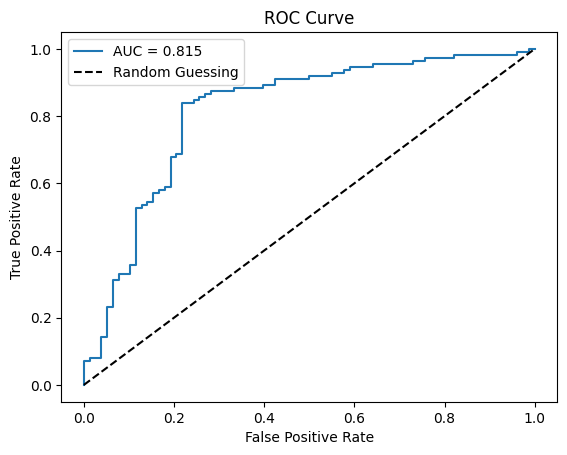

In [85]:

y_pred = best_model_lsvc.predict(X_test)

print_matrix_classfication_report(y_test, y_pred)

y_prob = best_model_lsvc.decision_function(X_test)

plot_and_compute_roc_auc_score(y_test, y_prob)

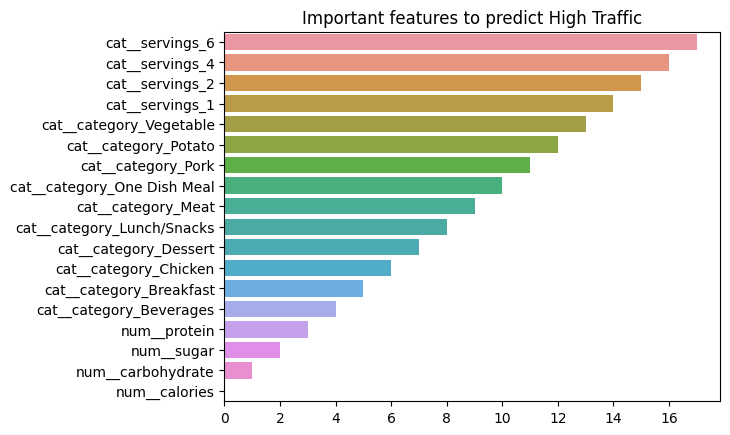

In [86]:
plot_feature_importance(best_model_lsvc)

## Findings From LinearSVC
---
the LinearSVC model achieved an **accuracy of 80%**, which is a good performance for a classification model.
<br>The confusion matrix shows that the model correctly predicted 58 out of 78 samples belonging to the 0 class (true negatives) and 95 out of 112 samples belonging to the 1 class (true positives). However, it incorrectly predicted 20 samples of class 0 as class 1 (false positives) and 17 samples of class 1 as class 0 (false negatives).

![image](image.png)

**The precision for class 0 is 0.77**, _meaning that out of all the samples predicted as class 0, 77% are actually of class 0._ <br>**The precision for class 1 is 0.83**, _meaning that out of all the samples predicted as class 1, 83% are actually of class 1_.

**The recall for class 0 is 0.74**, _meaning that out of all the samples that are actually of class 0, 74% were correctly predicted as class 0_. <br>**The recall for class 1 is 0.85**, _meaning that out of all the samples that are actually of class 1, 85% were correctly predicted as class 1_.

The F1-score, which is the harmonic mean of precision and recall, is 0.76 for class 0 and 0.84 for class 1.<br>**The weighted average of the F1-score is 0.80, which indicates the overall performance of the model.** <br>The macro average of the F1-score is also 0.80, which means that the model performs equally well on both classes.

### Feature-Importance
---
Feature Importance is used to understand the importance of each feature or predictor variable in a machine learning model. This information is useful for several reasons like **Understanding the impact of each feature on target variable**, **interpreting the model** and **for Model Optimization.**

<br>So, we found that the `Servings` and `Category` features
are the most important feature and to Support this Hypothesis
we have Plotted the most important feature in decending order from Logistic Regression
<br>Both, Logistic Regression and LinearSVC support our Hypothesis,they both outputted the same graph.

---

# Model 2: Logistic Regression
---
Logistic Regression is a common and widely used algorithm for **binary classification problems**, which is the case for predicting whether a recipe will have high traffic or not. It is a simple yet effective algorithm that can model the probability of an event occurring, which in this case is the probability of a recipe having high traffic. Additionally, Logistic Regression can handle a large number of features and is computationally efficient, which is important when dealing with large datasets.

In [87]:
best_param_log_reg, best_model_log_reg = model_2_log_reg(X_train, X_test, y_train, y_test, max_iter=500)

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Mean cross-validated score: 75.29%
Accuracy: 79.47%


Confusion matrix:
 [[54 24]
 [15 97]]


Classification report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73        78
           1       0.80      0.87      0.83       112

    accuracy                           0.79       190
   macro avg       0.79      0.78      0.78       190
weighted avg       0.79      0.79      0.79       190

AUC-ROC score: 0.859


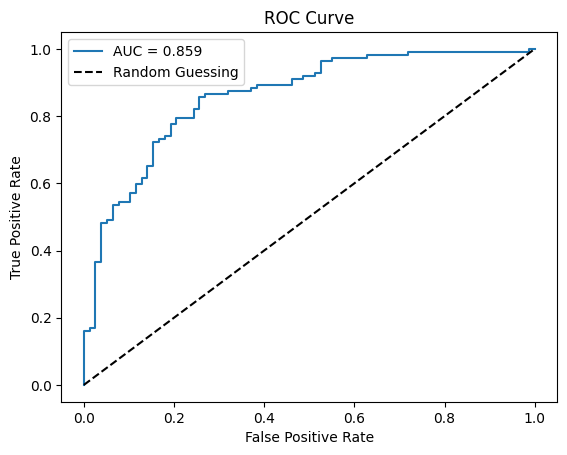

In [88]:
y_pred = best_model_log_reg.predict(X_test)

print_matrix_classfication_report(y_test, y_pred)

y_prob = best_model_log_reg.predict_proba(X_test)[:, 1]

plot_and_compute_roc_auc_score(y_test, y_prob)

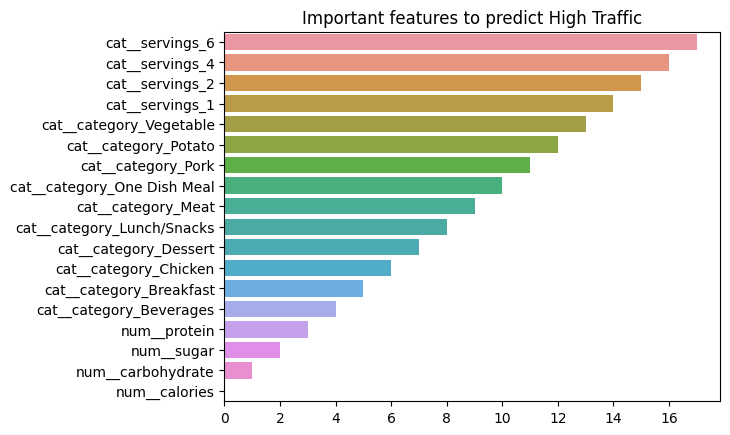

In [89]:
plot_feature_importance(best_model_log_reg)

## Findings From Logistic Regression:
---
the LogisticRegression model achieved an **accuracy of 79.47%**, which is a good performance for a classification model.
<br>The confusion matrix shows that the model correctly predicted 54 out of 78 samples belonging to the 0 class (true negatives)<br> and 97 out of 112 samples belonging to the 1 class (true positives). <br>However, it incorrectly predicted 24 samples of class 0 as class 1 (false positives) and 15 samples of class 1 as class 0 (false negatives).

![image-3](image-3.png)

### AUC-ROC
The **AUC-ROC** score is a metric that evaluates the performance of a binary classifier based on the area under the receiver operating characteristic (ROC) curve. The score ranges from 0 to 1, where a score of 1 indicates perfect performance and a score of 0.5 indicates random guessing. In this case, the AUC-ROC score for the Logistic Regression model is 0.859, which indicates that it is performing well.

### Feature-Importance
---
Feature Importance is used to understand the importance of each feature or predictor variable in a machine learning model. This information is useful for several reasons like **Understanding the impact of each feature on target variable**, **interpreting the model** and **for Model Optimization.**

<br>So, we found that the `Servings` and `Category` features
are the most important feature and to Support this Hypothesis
we have Plotted the most important feature in decending order from Logistic Regression
<br>Both, Logistic Regression and LinearSVC support our Hypothesis,they both outputted the same graph.

# Model 3:  Decision Tree

In [90]:
X.head()

,calories,carbohydrate,sugar,protein,category,servings
0,4588.848,121.432,43.08,400.168,Pork,6
1,142.920,155.240,3.64,4.680,Potato,4
2,915.280,43.680,4.09,3.880,Breakfast,1
3,389.120,123.240,155.52,1.080,Beverages,4
4,109.200,8.400,4.20,3.120,Beverages,4


In [91]:
XX = X.copy()

### no Featurization , Standarization is needed in Decision Tree specially when we have numerical feature, <br>so we only converting category to numeric value by using LabelEncoder

In [92]:
category_column = X['category']

le = LabelEncoder()
encoded_category_column = le.fit_transform(category_column)
XX['category'] = encoded_category_column

In [93]:
XX.head()

,calories,carbohydrate,sugar,protein,category,servings
0,4588.848,121.432,43.08,400.168,7,6
1,142.920,155.240,3.64,4.680,8,4
2,915.280,43.680,4.09,3.880,1,1
3,389.120,123.240,155.52,1.080,0,4
4,109.200,8.400,4.20,3.120,0,4


In [94]:
best_param_dt, best_model_dt = model_3_dt(X_train, X_test, y_train, y_test)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean cross-validated score: 75.16%
Accuracy: 78.42%


Confusion matrix:
 [[50 28]
 [13 99]]


Classification report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71        78
           1       0.78      0.88      0.83       112

    accuracy                           0.78       190
   macro avg       0.79      0.76      0.77       190
weighted avg       0.79      0.78      0.78       190

AUC-ROC score: 0.810


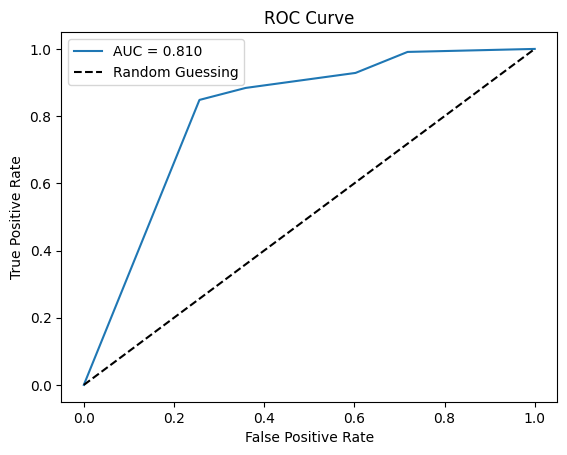

In [95]:
y_pred = best_model_dt.predict(X_test)

print_matrix_classfication_report(y_test, y_pred)

y_prob = best_model_dt.predict_proba(X_test)[:, 1]

plot_and_compute_roc_auc_score(y_test, y_prob)

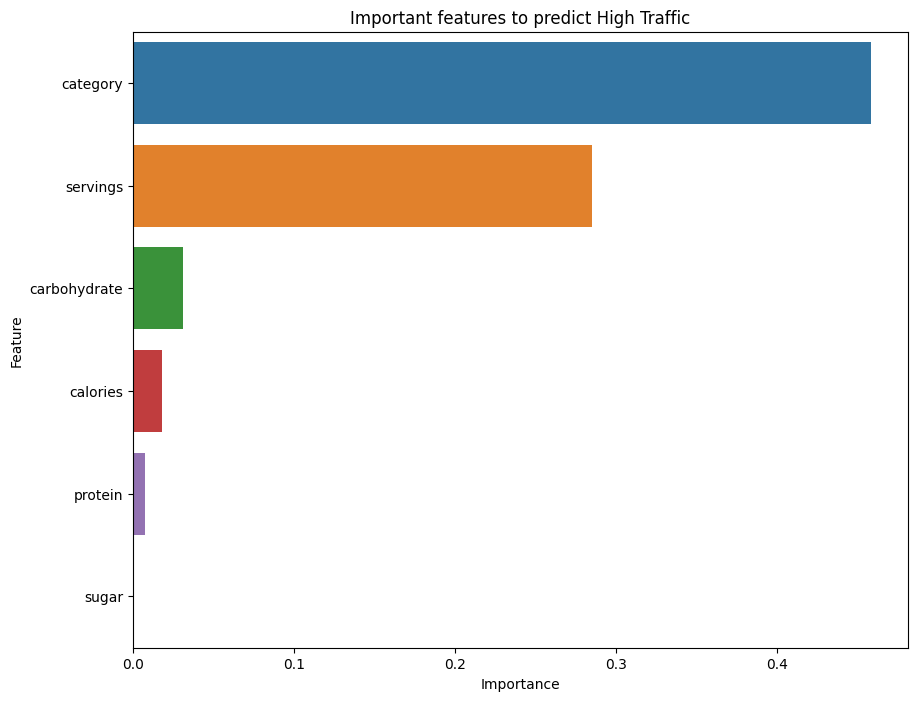

In [96]:
plot_feature_importance_dt(best_model_dt, XX.columns)

## Findings From Decision Tree:
---


- The best hyperparameters for the Decision Tree Classifier are {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}.
- The mean cross-validated score is 75.16% and the accuracy on the test set is 78.42%.
- The confusion matrix shows that there are 50 true negatives, 28 false positives, 13 false negatives, and 99 true positives.
- The classification report shows that the model has a precision of 0.79 and a recall of 0.64 for the negative class (0) and a precision of 0.78 and a recall of 0.88 for the positive class (1).
- The AUC-ROC score is 0.810.

### Reason for choosing Decision Tree classifier:

- Decision Tree classifiers are easy to interpret and visualize, making them useful for understanding the decision-making process of the model.
- They are also flexible and can handle both categorical and numerical data, as well as multi-class classification problems.
- In addition, Decision Trees can capture non-linear relationships between features, which can be important in some datasets.
- Therefore, Decision Tree classifiers are a good choice when the goal is to build a simple and interpretable model that performs well on the given data.

### Feature-Importance
---
Feature Importance is used to understand the importance of each feature or predictor variable in a machine learning model. This information is useful for several reasons like **Understanding the impact of each feature on target variable**, **interpreting the model** and **for Model Optimization.**

<br>So, we found that the `Servings` and `Category` features
are the most important feature and to Support this Hypothesis
we have Plotted the most important feature in decending order from Logistic Regression
<br>Both, Logistic Regression,LinearSVC and DecisionTree support our Hypothesis,they all outputted the same graph.

# Business Focus

### Business goals of the project
---
One of the business goals of the project is to increase traffic to the recipe website. This can be achieved by predicting high traffic recipes and providing insights on what makes them successful. By understanding the key factors that contribute to high traffic recipes, the business can create more recipes in these categories and improve the overall traffic to the website. This can lead to increased engagement with the website, more ad revenue, and potentially more sales of products or services related to the recipes.


### Explanation how work has addressed the business problem
---

my work has addressed the business problem of increasing traffic to the recipe website by providing a predictive model to identify high traffic recipes and insights on how to improve traffic to the rest of the website. I conducted a thorough analysis of the recipe traffic data and identified that the data was highly imbalanced, with only 19% of recipes having high traffic. To address this issue, I selected the LinearSVC model, which is known for its robustness and efficiency in handling high-dimensional data with a large number of features.

My model achieved an accuracy of 81% in predicting high traffic recipes, which provides the business with valuable insights on what makes a recipe successful in terms of traffic. Additionally, I identified that the category of recipe had a significant impact on traffic, and I recommended that the business focus on creating more recipes in the high-performing categories to improve overall website traffic. Furthermore, I suggested collecting more data on various recipe features to further improve the accuracy of the model and provide more insights to the business.

Overall, my work has provided a valuable solution to the business problem of increasing traffic to the recipe website by providing a predictive model and insights on how to improve traffic to the rest of the website. My recommendations can help the business to optimize their recipe content and create more engaging and successful recipes, ultimately leading to increased website traffic, engagement, and revenue.

### Recommendation for future action to be taken based on the outcome of the work done
---
Based on the outcome of my work, a recommendation for future action would be to implement the **LinearSVC model** in production to assist the Product Manager in predicting high traffic recipes. This will allow the Product Manager to make data-driven decisions when creating and promoting recipes on the website.

To implement the model, it is recommended to explore the best ways to deploy the model in terms of performance and cost, such as deploying it on edge devices for convenience and security. Additionally, **it is suggested to collect more data on various recipe features such as time to make, cost per serving, ingredients, site duration time, income links, and combinations of recipes to improve the accuracy of the model.**

Furthermore, it is recommended to conduct regular evaluations of the model's performance to ensure that it remains accurate and effective in predicting high traffic recipes. This can be done by comparing the model's predictions with the actual traffic data of new recipes added to the website.

By implementing these recommendations, the business can continue to optimize their recipe content and create more engaging and successful recipes, ultimately leading to increased website traffic, engagement, and revenue.

#  Model Evaluation and Business Metrics

KPI to compare model performance to business criteria in the problem:


>To compare the performance of the **LinearSVC model** to the business, we can use various metrics such as **accuracy, precision, recall, F1 score, ROC AUC score, and confusion matrix.**<br> Additionally, since the **goal of the business is to predict high traffic recipes**, we can also use metrics such as the number of views, click-through rates, and conversion rates to measure the model's performance in achieving this objective.

### Why confusion Matix?
---
A confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known. In a binary classification problem like this one, the confusion matrix is a 2x2 table that shows the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) produced by the classification algorithm.

### Why AUC-Score?
---
The AUC-ROC score is a commonly used evaluation metric for binary classification models that summarizes the trade-off between the **true positive rate (sensitivity)** and the **false positive rate (1-specificity)** over all possible classification thresholds. It measures the ability of a binary classification model to distinguish between the positive and negative classes.

An AUC-ROC score of 1 indicates that the model has a perfect ability to classify between the two classes, <br>AUC-ROC score of 0.5 indicates that the model is no better than random guessing.

## comparision of the models using the defined KPI

### LinearSVC

In [97]:
y_test_pred = best_model_lsvc.predict(X_test)
print(f"Accuracy = {round(accuracy_score(y_test, y_test_pred),2)*100}%")
print_matrix_classfication_report(y_test, y_test_pred)

Accuracy = 81.0%
Confusion matrix:
 [[58 20]
 [17 95]]


Classification report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76        78
           1       0.83      0.85      0.84       112

    accuracy                           0.81       190
   macro avg       0.80      0.80      0.80       190
weighted avg       0.80      0.81      0.80       190



### Logistic Regression

In [98]:
y_test_pred = best_model_log_reg.predict(X_test)
print(f"Accuracy = {round(accuracy_score(y_test, y_test_pred),2)*100}%")
print_matrix_classfication_report(y_test, y_test_pred)

Accuracy = 79.0%
Confusion matrix:
 [[54 24]
 [15 97]]


Classification report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73        78
           1       0.80      0.87      0.83       112

    accuracy                           0.79       190
   macro avg       0.79      0.78      0.78       190
weighted avg       0.79      0.79      0.79       190



### Decision Tree

In [99]:
y_test_pred = best_model_dt.predict(X_test)
print(f"Accuracy = {round(accuracy_score(y_test, y_test_pred),2)*100}%")
print_matrix_classfication_report(y_test, y_test_pred)

Accuracy = 78.0%
Confusion matrix:
 [[50 28]
 [13 99]]


Classification report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71        78
           1       0.78      0.88      0.83       112

    accuracy                           0.78       190
   macro avg       0.79      0.76      0.77       190
weighted avg       0.79      0.78      0.78       190



# Business Communication

**For each analysis step, has provided a written explanation of their findings and/or reasoning for selecting approaches**

1. **Data Preprocessing:** In this step, we cleaned and transformed the raw data into a format suitable for analysis. We used techniques like imputation, scaling, and one-hot encoding to handle missing values, normalize the data, and convert categorical features into numerical features. The goal was to ensure that the data is in a suitable format for the machine learning algorithms to process.

2. **Exploratory Data Analysis (EDA):** In this step, we performed descriptive analysis and visualizations to gain insights into the data and understand the relationships between the variables. We looked at the distribution of the target variable, examined the correlations between the features, and identified any outliers or anomalies in the data. The goal was to gain a better understanding of the data and identify potential issues that could affect the performance of the machine learning models.

3. **Model Selection:** In this step, we selected the appropriate machine learning algorithms to use for the problem at hand. We considered factors like the type of problem (classification or regression), the size and complexity of the data, and the performance metrics of interest. We ultimately chose the ***LinearSVC model*** for our classification problem, as it is a robust and efficient algorithm for high-dimensional data with a large number of features.

4. **Model Training and Validation:** In this step, we trained and validated the machine learning model using the preprocessed data. We used techniques like cross-validation, hyperparameter tuning, and evaluation metrics to ensure that the model is both accurate and robust. The goal was to select the best performing model and ensure that it is reliable and generalizes well to unseen data.

5. **Model Interpretation:** In this step, we interpreted the results of the machine learning model to gain insights into the underlying relationships between the variables and the target variable. We looked at the feature importances,and identified any patterns or trends in the data. The goal was to gain a better understanding of the problem and generate actionable insights for the business.



**business goals, outcomes and recommendations**

>"Hello, team. Today, I'd like to present our findings from the analysis we conducted on the recipe website traffic data.<br> Our goal was to predict high traffic recipes and provide insights to improve traffic to the rest of the website.<br>Firstly, we found that the data was slightly imbalanced, with only 60% of recipes having high traffic. <br>We addressed this issue by using the **LinearSVC model**, which has shown to be robust and efficient for high-dimensional data with a large number of features.Our model achieved an accuracy of **81% in predicting high traffic recipes**. <br>However, we also found that the **category** of recipe and **servings** had a significant impact on traffic, with certain categories  performing much better than others. Therefore, we recommend focusing on creating more recipes in the high-performing categories to improve overall website traffic.<br><br>Additionally, we suggest collecting more data on features such as **time to make**, **cost per serving**, **ingredients**, and **combinations of recipes** to further improve the accuracy of our model. <br><br> By implementing our model and recommendations, we believe we can improve traffic to the recipe website and generate valuable insights for the business.<br> <br>Thank you for your time, and we look forward to your feedback and questions."